# HW2 correction

## Exersice 12: Stock Market
A simple model for the stock market suggests that each day a stock with price $q$ will increase by a factor $r>1$
to $qr$ with probability $p$ and will fall to $q/r$ with probability $1-p$.
Assume that we start with a stock with price $1$.
Find a formula for the expected value and the variance of the price of the stock after $d$ days. 

**python**: Let $r = 1.1$, $p = 0.5$, and $q = 1$. Simulate $200$ stocks over $50$ days. Estimate the expected value and the variance of the price of the stock for $0\leq d \leq 50$ and compare with your theoretical results. Plot your results. 

### Answers:
After $d$ days:
* The expected value is $\text{E}[X] = \left( rp + \frac{1-p}{r} \right)^d$.
* The variance is $\text{Var}[X] = \left( r^2 p + \frac{1-p}{r^2}  \right)^d - \left( rp + \frac{1-p}{r} \right)^{2d}$.

### Solution:

Let $X$ be the value of the stock after $d$ days and let $N$ be the number of times the stock went up during this time. From the question we know that $N$  is binomial and hence the PMF's are
$$
    \Pr[N=n] = {d \choose n} p^n (1-p)^{(d-n)}
$$
and
$$
    \Pr[X = q \cdot r^{2n-d}] = \Pr[X = q \cdot r^{2n-d} | N=n] \cdot \Pr[N=n] + \Pr[X = q \cdot r^{2n-d} | N\not=n] \cdot \Pr[N\not=n] 
$$
$$
    = 1 \cdot \Pr[N=n] + 0 \cdot \Pr[N\not=n]
$$
$$
    \Rightarrow \Pr[X = q \cdot r^{2n-d}] = \Pr[N=n].
$$
For simplicity $q=1$ according to the text. The expected price after $d$ days is thus
$$
    \text{E}[X] = \sum_{n=0}^{d} r^{2n-d} {d \choose n} p^n (1-p)^{(d-n)} = \sum_{n=0}^{d} {d \choose n} (rp)^n \left(\frac{1-p}{r}\right)^{(d-n)}.
$$
We recognise this form as the expansion of a sum to the power of $d$:
$$
    (a+b)^n = \sum_{k=0}^{n} {n \choose k} a^{n-k} b^k.
$$
Plugging this in we get:
$$
    \text{E}[X] = \left( rp + \frac{1-p}{r} \right)^d.
$$
Next we calcualte 
$$
    \text{E}[X^2] = \sum_{n=0}^{d} \left(r^{2n-d} \right)^2 {d \choose n} p^n (1-p)^{(d-n)} = \sum_{n=0}^{d} {d \choose n} (r^2p)^n \left(\frac{1-p}{r^2}\right)^{(d-n)}
$$
$$
    = \left( r^2 p + \frac{1-p}{r^2}  \right)^d.
$$
We can now calculate the variance according to
$$
    \text{Var}[X] = \text{E}[X^2] - \text{E}[X]^2 = \left( r^2 p + \frac{1-p}{r^2}  \right)^d - \left( rp + \frac{1-p}{r} \right)^{2d}
$$




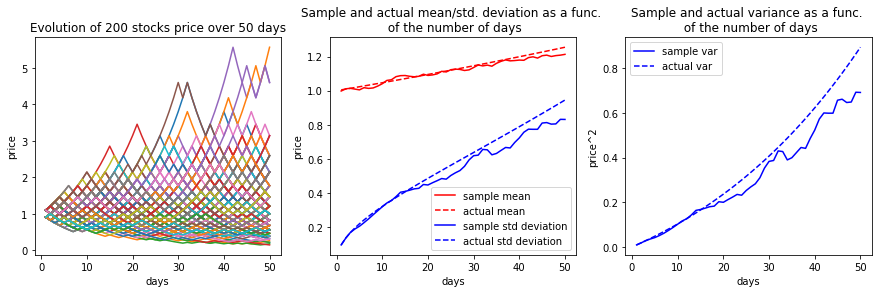

In [4]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.5
r = 1.1
q = 1

N = 200
D = 50

updown = np.random.choice(2,(N,D))

n_up = np.cumsum(updown,axis=1)
n_down = np.cumsum(1-updown,axis=1)

price = q*r**(n_up-n_down)

sample_mean = np.mean(price,axis=0)
sample_var = np.sum((price-sample_mean)**2/(N-1),axis=0)

days = np.arange(D) + 1
mean = q*(r*p + (1-p)/r)**days
var = q**2 *( (r**2 *p + (1-p)/(r**2) )**days - mean**2 )

# Plotting
fig, axs = plt.subplots(1, 3)

axs[0].plot(days,np.transpose(price))
axs[0].set_xlabel('days')
axs[0].set_ylabel('price')
axs[0].set_title('Evolution of 200 stocks price over 50 days')

axs[1].plot(days,sample_mean,'r')
axs[1].plot(days,mean,'r--')
axs[1].plot(days,sample_var**(0.5),'b')
axs[1].plot(days,var**(0.5),'b--')
axs[1].set_xlabel('days')
axs[1].set_ylabel('price')
axs[1].legend(['sample mean','actual mean',
               'sample std deviation','actual std deviation'])
axs[1].set_title('Sample and actual mean/std. deviation as a func. \n of the number of days')

axs[2].plot(days,sample_var,'b')
axs[2].plot(days,var,'b--')
axs[2].set_xlabel('days')
axs[2].set_ylabel('price^2')
axs[2].legend(['sample var','actual var'])
axs[2].set_title('Sample and actual variance as a func. \n of the number of days')

fig.set_figwidth(15)

plt.show()

## Exersice 15: Tail bounds
We have a standard six-sided die.
Let $X$ be the number of times that a $6$ occurs over $n$ throws of the die.
Let $p$ the probability of the event $X \geq n/4$.
Compare the best upper bounds on $p$ that you can obtain using Markov's inequality
Chebyshev's inequality, and Chernoff bounds.

**python**: Simulate the dice throws for $10 \leq n \leq 150$ over $1000$ instances and estimate $p$ for the different values of $n$. Calculate the actual value of $p$. Compare the simulations and the bounds with the actual value of $p$. Plot your results. Which gives a better approximation for $p$ for different values of $n$?

### Answers: 
* Markov gives: $\Pr\left[ X \geq \frac{n}{4} \right] \leq  \frac{2}{3}$.
* Chebyshev gives: $\Pr\left[ X \geq \frac{n}{4} \right] \leq \frac{20}{n}$
* Chernoff gives: $\Pr\left[ X \geq \frac{n}{4} \right] \leq \left( \frac{10 \cdot 3^{\frac{1}{4}}}{9 \cdot 5^{\frac{1}{4}}} \right)^n \approx 0.978^n$ 

### Solution:

We start by calculating some terms that will be needed later on. From the given information we can gather that $X$ is Binomial distributed with parameters $n$ and $p = \frac{1}{6}$. The mean is
$$
    \text{E}[X] = np = \frac{n}{6}
$$
and the variance is
$$
    \text{Var}[X] = n p (1-p) = \frac{5n}{36}.
$$
The Markov bound gives us 
$$
    \Pr\left[ X \geq \frac{n}{4} \right] \leq \frac{\frac{n}{6}}{\frac{n}{4}} = \frac{2}{3}.
$$
Moving on to the Chebyshev bound we have 
$$
    \Pr\left[ X \geq \frac{n}{4} \right] = \Pr\left[ X - \frac{n}{6} \geq \frac{n}{12} \right] \leq \Pr\left[ \left| X - \frac{n}{6} \right| \geq \frac{n}{12} \right] \leq \frac{\frac{5n}{36}}{\left( \frac{n}{12} \right)^2 } = \frac{20}{n}.
$$
Last but not least, for the Chernoff bound we can use the formula in the notes with $\delta = 0.5$
$$
    \Pr\left[  X - \frac{n}{6} \geq \frac{n}{12} \right] \leq e^{-\frac{1}{4} \frac{n}{6} \frac{1}{3}} = e^{-\frac{n}{72}}.
$$
We could also derive a tighter bound using the definition of the Chernoff bound
$$
    \Pr[X \geq a] \leq \min_{t > 0} \frac{M_X(t)}{e^{ta}},
$$
where the MGF is
$$
    M_X(t) = (1 + p(e^t-1))^n.
$$
Doing this (by calculating and inserting the minumun $t$) gives the following tighter bound
$$
    \Pr\left[ X \geq \frac{n}{4} \right] \leq \left( \frac{10 \cdot 3^{\frac{1}{4}}}{9 \cdot 5^{\frac{1}{4}}} \right)^n \approx 0.978^n.
$$
We can plot and simualte these limits for the desired interval

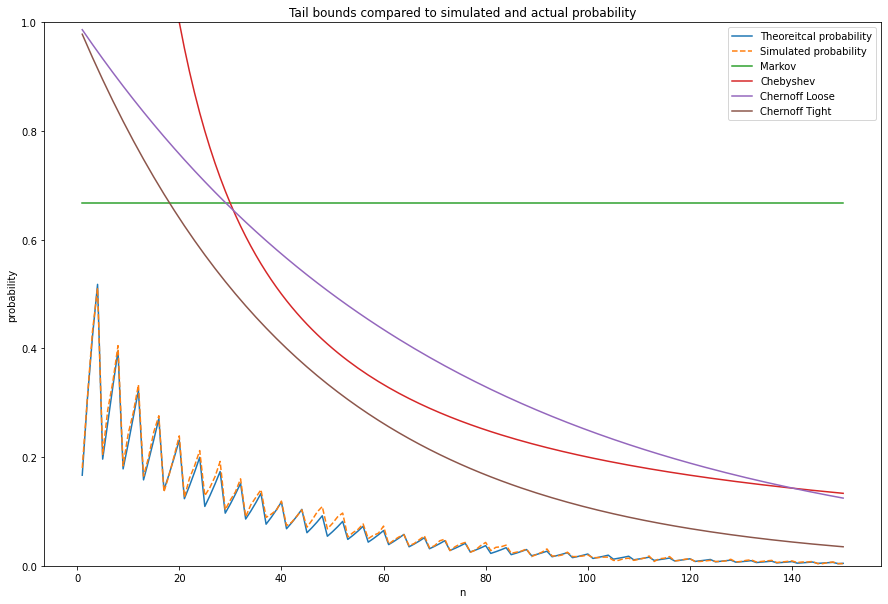

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = np.arange(1,151)
N_dice = 1000*np.amax(n);
p_est = np.zeros(n.shape)
p = np.zeros(n.shape)

diceis6 = np.random.choice(2,N_dice,p=[5/6,1/6])

for i in range(len(n)):
    tmp = diceis6[0:1000*n[i]].reshape([n[i],1000])
    tmp = np.sum(tmp,axis=0)
    p_est[i] = np.sum(tmp >= n[i]/4)/1000
    p[i] = 1 - stats.binom.cdf(np.ceil(n[i]/4-1),n[i],1./6.)

markov = 2/3*np.ones(n.shape)    
cheby = 20/n
chern_loose = np.exp(-n/72)
chern_tight = (10*3**0.25/9/5**0.25)**n

fig = plt.figure(figsize = [15,10])
plt.plot(n,p)
plt.plot(n,p_est,'--')
plt.plot(n,markov)
plt.plot(n,cheby)
plt.plot(n,chern_loose)
plt.plot(n,chern_tight)

plt.ylim([0,1])

plt.ylabel('probability')
plt.xlabel('n')
plt.title('Tail bounds compared to simulated and actual probability')

plt.legend(['Theoreitcal probability','Simulated probability',
            'Markov','Chebyshev','Chernoff Loose','Chernoff Tight'])

plt.show()